In [0]:
# Neural Networks

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
train_images[0].shape

(28, 28)

In [0]:
train_labels[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Anckle Boot']

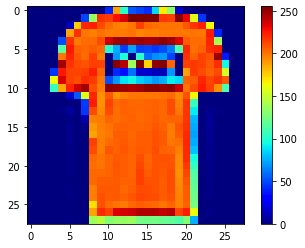

In [0]:
plt.figure()
plt.imshow(train_images[1], cmap='jet')
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Normalize

train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
# sequential model recommended for newbies.
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [0]:
inputs = keras.Input(shape=(28, 28))
flat1 = keras.layers.Flatten()(inputs)
dense1 = keras.layers.Dense(128, activation='relu')(flat1)
outputs = keras.layers.Dense(10, activation='softmax')(dense1)
model = keras.Model(inputs=inputs, outputs=outputs)

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4984 - accuracy: 0.8252 - val_loss: 0.4382 - val_accuracy: 0.8426
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3759 - accuracy: 0.8642 - val_loss: 0.3842 - val_accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3387 - accuracy: 0.8753 - val_loss: 0.3730 - val_accuracy: 0.8663
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8845 - val_loss: 0.3624 - val_accuracy: 0.8689
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2967 - accuracy: 0.8903 - val_loss: 0.3467 - val_accuracy: 0.8760
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2822 - accuracy: 0.8951 - val_loss: 0.3520 - val_accuracy: 0.8765
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2717 - accuracy: 0.8983 - val_loss: 0.3537 - val_accuracy:

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8851


(0.33808276057243347, 0.8851000070571899)

(10000, 10)
[1.0508415e-06 5.4245519e-10 3.3493606e-09 1.9860652e-10 3.5004309e-06
 3.8244869e-04 3.7112321e-07 4.2554066e-02 5.3243671e-06 9.5705324e-01]
9
Anckle Boot


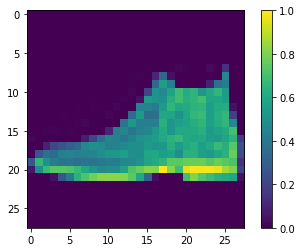

In [0]:
predictions = model.predict(test_images)
print(predictions.shape)
print(predictions[0])
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])
plt.imshow(test_images[0])
plt.colorbar()